<a href="https://colab.research.google.com/github/21Ovi/Employee-Performance-Analysis/blob/main/Visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Below code is for getting figure in center alignment
from IPython.core.display import HTML
HTML("""

.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

""")

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Avoiding warnings
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [3]:
data = pd.read_excel('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls', index_col=0)
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


### Column names

In [17]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

## Data Insight

### Employee Department Analysis

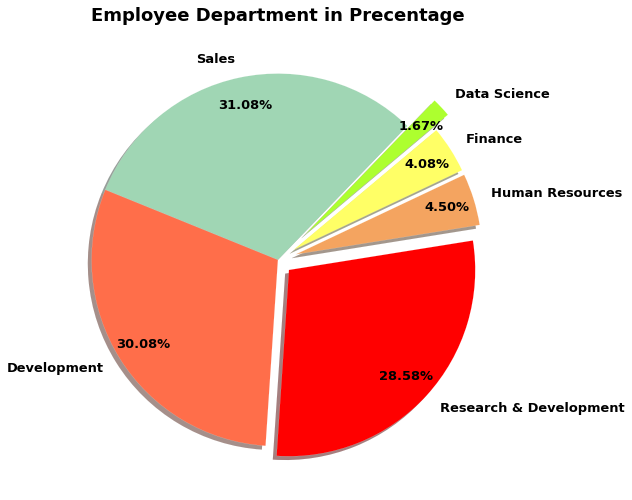

In [22]:
# Pie chart for employee department analysis
percent_1=[]

for i in data.EmpDepartment.value_counts():
  percent_1.append(i)

wedgeprops = {"linewidth": 0.1, "width": 1, "edgecolor":"W"}
plt.figure(figsize = (10, 15))
color = ["#","#","#","#","#","#"]
color = ["#a0d6b4","#ff6e4a","#ff0000","#f4a460","#ffff66","#adff2f"]

plt.pie(percent_1, labels=['Sales', 'Development', 'Research & Development', 'Human Resources', 'Finance', 'Data Science'],
       explode = [0, 0, 0.08, 0.1, 0.1, 0.2],  autopct = "%0.2f%%", startangle = 46, shadow = True, pctdistance = 0.85,
        wedgeprops = wedgeprops,textprops = {"fontsize":13,"fontweight":"bold"},rotatelabels=False, colors = color)
plt.title("Employee Department in Precentage", fontsize=18, fontweight="bold")
plt.tight_layout(pad=6);

Employee Department is classified into 6 parts:

1. **`Sales`** : `31.08%` of employees in this firm are from this department.
2. **`Development`** : In order to run the firm, Development department is responsible to fetch funds. So, `30.08%` of employees belongs from development department.
3. **`Research & Development`** : Research and development (R&D) is when businesses gather knowledge to create new products or discover new ways to improve their existing products and services. R&D is done on products which indicates this this a `product based company`. This department holds `28.58%` of employees.
4. **`Human Resources`** :  The human resource department's mission is to make sure the company's employees are adequately managed, appropriately compensated, and effectively trained. The department is also responsible for recruiting, hiring, firing, and administering benefit.This department have `4.50%` employees.
5. **`Finance`** : Finance Departmnet have`4.08%` employees.This department is the part of an organization that is responsible for acquiring funds for the firm, managing funds within the organization and planning for the expenditure of funds on various assets.
6. **`Data Science`** : This department generate insights which analysts and business users can translate into tangible business value. Its a trending field now-a-days.This department having `1.67%` employees.

## Department wise Performance

In [23]:
# Histogram graph for department wise performance
def customLegend(fig, nameSwap):
    for i, dat in enumerate(fig.data):
        for elem in dat:
            if elem == 'name':
                fig.data[i].name = nameSwap[fig.data[i].name]
    return(fig)
    
fig1 = px.histogram(data, x="EmpDepartment",color="PerformanceRating",barmode='group',
                    color_discrete_sequence=['#cb4154','#ffd700', '#8db600'],
                   labels=dict(EmpDepartment="Employee Department"),
                   title="Department vs Performance Rating",width=990,template="presentation")

fig1.update_layout(title_x=0.5,title_font_size=20,font_size=11,xaxis_showgrid=False, yaxis_showgrid=False,
                   legend=dict(title="Performance Rating"))

fig1 = customLegend(fig=fig1, nameSwap = {'3': 'Excellent', '2':'Good','4':"Outstanding"}) 

fig1.show();

* As shown in above figure, every department employees gives Excellent performance rating more in number.
* More number of employees are avilable in Sales & Development, so their count is high.
* In Development Department, here more number of Outstanding Performance compared to Good Performance of an employees.

## Employees Education Background analysis

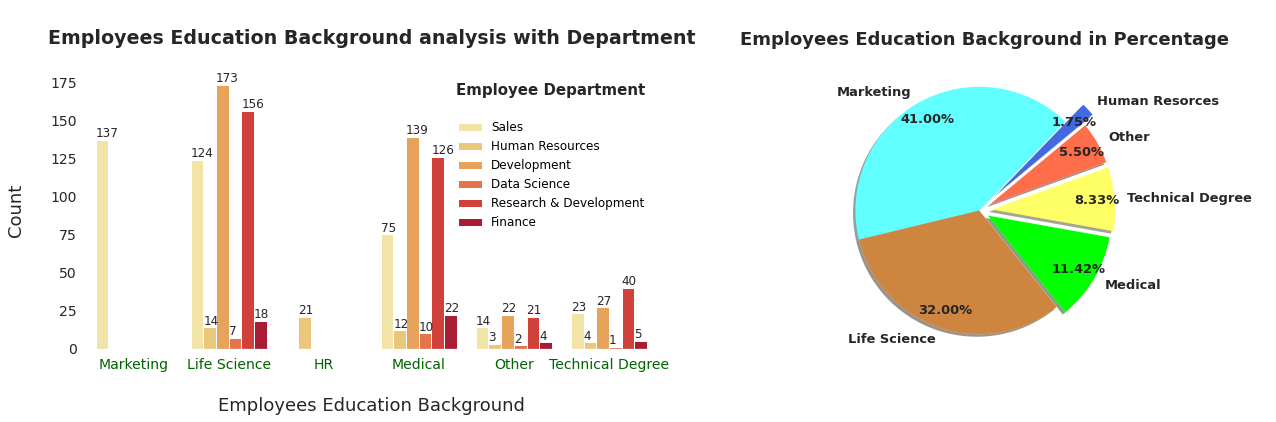

In [24]:
#setting up seaborn for figure
sns.set(rc={"font.size":12,"axes.titlesize":18,"axes.labelsize":18,"xtick.labelsize":14,"ytick.labelsize":14,
            "legend.fontsize":12,'axes.grid' : False,'axes.facecolor': 'white'})

#pie chart for employees education background
percent_2=[]
for i in data['EducationBackground'].value_counts():
    percent_2.append(i)
    
wedgeprops = {"linewidth": 0.1, 'width':1, "edgecolor":"w"}
color = ["#61ffff","#cd853f","#00ff00","#ffff66","#ff6e4a","royalblue"]

plt.figure(figsize = (20,8))

plt.subplot(1,2,1)

#countplot chart for employees education background for department analysis
ax = sns.countplot(x=data['EducationBackground'],hue=data["EmpDepartment"],palette="YlOrRd")
plt.title("\nEmployees Education Background analysis with Department\n",fontweight="bold",fontsize=19)
plt.xlabel("\nEmployees Education Background")
plt.xticks(ticks=[0,1,2,3,4,5],labels=["Marketing","Life Science","HR","Medical","Other","Technical Degree"], color="darkgreen")
plt.ylabel("Count\n")
legend = plt.legend()
legend.set_title("Employee Department\n",prop={"size":15,"weight":"bold"})
plt.setp(legend.get_texts(), color='black')
legend.draw_frame(False)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+2))
plt.tight_layout(pad=2)

plt.subplot(1,2,2)
plt.pie(percent_2,labels = ["Marketing","Life Science","Medical","Technical Degree","Other","Human Resorces"],
        explode = [0,0,0.08,0.1,0.1,0.2], autopct = "%0.2f%%", startangle =46,shadow = True,
        pctdistance = 0.85,wedgeprops = wedgeprops,textprops = {"fontsize":13,"fontweight":"bold"},rotatelabels=False,
        colors = color) 
plt.title("Employees Education Background in Percentage\n",fontsize=18,fontweight='bold',)
plt.tight_layout(pad=7)
plt.axis('equal')
plt.show()